<a href="https://colab.research.google.com/github/GeovaniOrt/Redes-Neuronales/blob/main/Red_Convolucional/Clasificaci%C3%B3n_de_D%C3%ADgitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales  

## Redes Convolucionales (CNN)

Una red convolucional (`CNN`) es un tipo de red neuronal artificial *especializada en el análisis de datos en formato de rejilla*, como las imágenes, inspirada en el sistema visual humano. Su arquitectura incluye capas convolucionales que aplican filtros para extraer características automáticamente, capas de agrupación (pooling) para reducir la dimensionalidad, y capas finales de clasificación para la toma de decisiones. Las CNN son muy eficaces para tareas de visión por computadora como el reconocimiento de imágenes, detección de objetos y análisis de radiología.

### Componentes:

* **Capas convolucionales**: Estas capas utilizan filtros (kernels) que se deslizan sobre los datos de entrada, aplicando operaciones matemáticas para detectar patrones como bordes, texturas o formas básicas. Los filtros aprenden a identificar características relevantes de manera automática durante el entrenamiento.


* **Capas de agrupación (Pooling)**: Se utilizan para reducir el tamaño espacial (ancho y alto) de las representaciones, disminuyendo la cantidad de parámetros y haciendo la red más eficiente y menos sensible a pequeñas variaciones en la posición de las características. La operación de "max pooling" es una de las más comunes.


* **Capas de clasificación**: Al final de la red, se encuentran capas neuronales más sencillas que toman las características extraídas por las capas convolucionales para realizar la clasificación final (por ejemplo, identificar si una imagen contiene un gato o un perro).

### Clasificación de dígitos

#### MNIST Dataset

In [1]:
"""
Cargar el conjunto de datos MNIST de dígitos escritos a mano
"""
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
"""
Explorar el dataset
"""
digits.keys()

## El resultado qyue va a arrojar el dataset sera: ##

"""dict_keys([
    'data', 'target', 'frame',
    'feature_names', 'target_names', 'images',
    'DESCR'
])
"""

"dict_keys([\n    'data', 'target', 'frame',\n    'feature_names', 'target_names', 'images',\n    'DESCR'\n])\n"

In [3]:
"""
Describe el conjunto de datos
"""
type(digits)

sklearn.utils._bunch.Bunch

In [4]:
"""
Imprimimos la llave DESCR para obtener la información del conjuto de datos
"""
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

#### Visualización de una imagen

""" Explorar los datos del dataset """

In [5]:
"""
Es necesario fijar el índice de la imagen que vamos a visualizar
"""
## Se puede usar cualquier dígito de entre 0 y 9
index = 0

In [6]:
"""
Obtener la imagen del dígito y su etiqueta
"""
image = digits.images[index]
label = digits.target[index]

In [7]:
"""
Imprimimos la representación matricial (numérica) de la imagen
"""
print(image)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


""" Visualizar un elemento """

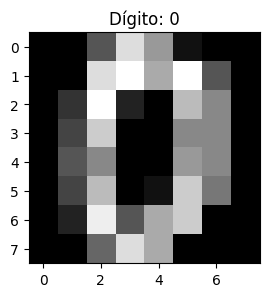

--------------------------------------------------


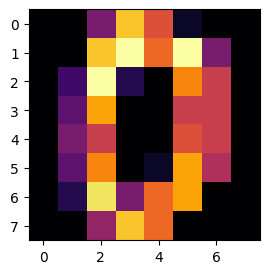

In [30]:
"""
Mostramos la imagen con Matplotlib
"""
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.grey) #El comando: cmap=plt.cm.inferno permite cambiar el color, a la hora de mostrarlo
plt.title(f'Dígito: {label}')
plt.show()

print("-"*50)

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.inferno)
plt.show()

#### Procesamiento de datos

In [9]:
"""
Dividir los datos en conjuntos de entrenamiento y prueba
"""
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [10]:
"""
Notemos la longitud del conjunto de entrenamiento y de test son respectivamente:
"""
############### Podemos mostrar la longitud/rango de datos
print(len(X_train))
print(len(X_test))
###############
print("-"*50)
###############
print(X_train.shape)
print(X_test.shape)

1437
360
--------------------------------------------------
(1437, 64)
(360, 64)


In [11]:
"""
Notamos como se ve el primer elemento de la variable X_train
"""
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)

tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [12]:
"""
Otra forma de imprimir el elemento de la variable X_train es:
"""
print(X_train[0])

[ 0.  0.  3. 14.  1.  0.  0.  0.  0.  0. 12. 12.  0.  0.  0.  0.  0.  3.
 16.  6.  0.  0.  0.  0.  0.  5. 16.  2.  0.  0.  0.  0.  0.  6. 16.  2.
  5.  2.  0.  0.  0.  4. 16.  2. 12. 15.  2.  0.  0.  1. 14. 13.  2. 13.
 11.  0.  0.  0.  3. 11. 16. 13.  4.  0.]


In [13]:
"""
Escalar las imágenes para normalizar los valores de píxeles
"""
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
"""
Ahora notamos como se ve el primer elemento de la variable X_train después de la normalización
"""
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))

# Redondeamos para tener una mejor visualizacion
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor)

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [15]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

In [16]:
"""
Describe el conjunto de datos de entrenamiento
"""
X_train.shape[0]
type(X_train)

tensorflow.python.framework.ops.EagerTensor

#### Red neuronal convolucional

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), #Esta es una capa oculta de 2 Dimensiones #El Kernel de 3x3 hara una covcolución 32 veces
        activation='relu',
        input_shape=(8, 8, 1)
    ),
    MaxPooling2D(pool_size=(2, 2)), #El MaxPooling2D funciona despues de la función de activación
    Flatten(), #Aplana el resultado y lo convierte en un vector
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') #Capa de salida
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compilar el modelo

In [18]:
"""
Crear un optimizador Adam con una tasa de aprendizaje del 0.001
"""
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#### Entrenar el modelo

In [20]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.4202 - loss: 1.9367 - val_accuracy: 0.8403 - val_loss: 0.9396
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9091 - loss: 0.6695 - val_accuracy: 0.8993 - val_loss: 0.4285
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9529 - loss: 0.2727 - val_accuracy: 0.9375 - val_loss: 0.2694
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9699 - loss: 0.1530 - val_accuracy: 0.9410 - val_loss: 0.2176
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9821 - loss: 0.1167 - val_accuracy: 0.9514 - val_loss: 0.1872
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9865 - loss: 0.0841 - val_accuracy: 0.9653 - val_loss: 0.1489
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9906 - loss: 0.0622 - val_accuracy: 0.9618 - val_loss: 0.1405
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9920 - loss: 0.0533 - val_accuracy: 0.9549 - va

#### Función de perdida

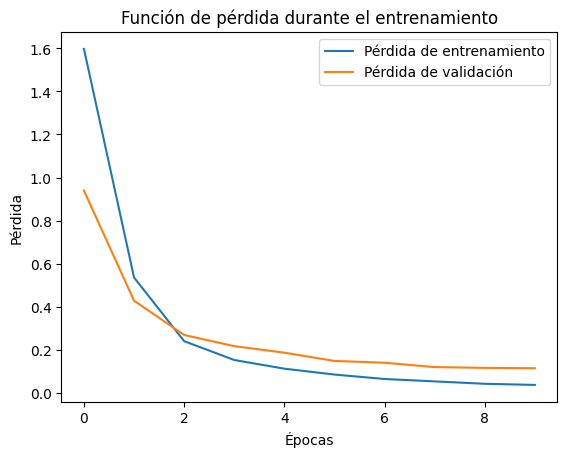

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

#### Evaluación

In [22]:
"""
Evaluar el modelo en el conjunto de prueba
"""
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9882 - loss: 0.0481
Loss: 0.06264089792966843, Accuracy: 0.9777777791023254


#### Matriz de confusión y la sensibilidad (recall)

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


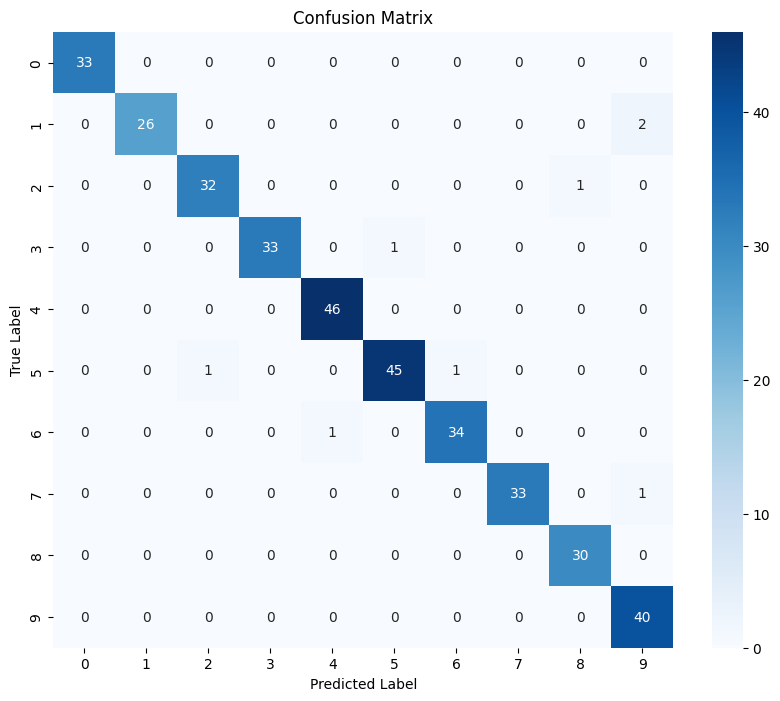

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.9285714285714286
Class 2: 0.9696969696969697
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9574468085106383
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 1.0
Class 9: 1.0


In [24]:
"""
Visualizar la matriz de confusión y mostrar la sensibilidad para cada clase
"""
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')

#### Predecir una imagen distinta al conjunto de datos

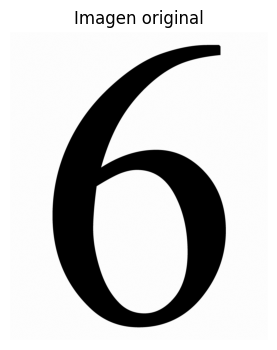

In [25]:
"""
Leer la imagen
"""
from PIL import Image
import matplotlib.pyplot as plt

# Cambia por el nombre de tu archivo
ruta = "/content/#6.png"
# Escala de grises ("L")
img = Image.open(ruta).convert("L")

# mostrar la imagen
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Imagen original")
plt.axis("off")
plt.show()

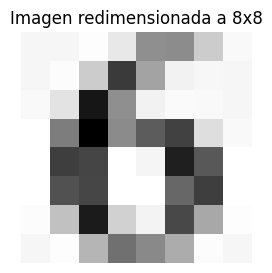

In [26]:
"""
Redimensionar la imagen
"""
##################################
img = img.resize((8, 8))
import matplotlib.pyplot as plt
##################################

# redimensionar a 8x8
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# mostrar imagen
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap="gray")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")
plt.show()

# opcional, guardamos la imagen si es necesario
img_resized.save("imagen_8x8.png")

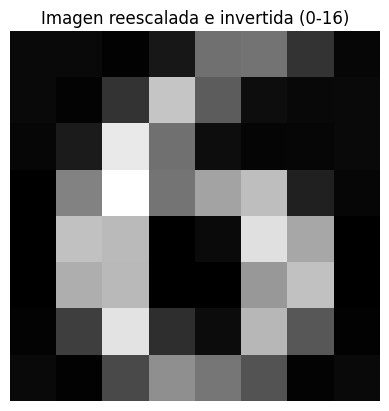

In [27]:
"""
Procesamiento
"""
import matplotlib.pyplot as plt
import numpy as np

# reescalar de 0-255 a 0-16 e invertir (fondo negro = 0)
img_array = np.array(img_resized).astype("float32")
img_array = 16 - (img_array / 255 * 16)

# mostrar imagen
plt.imshow(img_array, cmap="gray")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()

In [28]:
"""
Estandarizar la imagen
"""
from sklearn.preprocessing import StandardScaler

# normalizar
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)

In [29]:
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)
#En este caso la CNN fallo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
Predicción: 5
